In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Some Urban Images: 


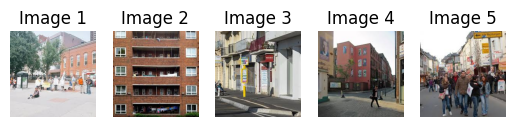

Some Rural Images: 


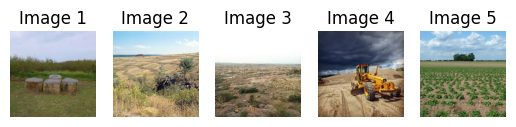

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

folder_path_urban = "/content/drive/MyDrive/Colab Notebooks/Hsoub/L3/images/val/urban"
folder_path_rural = "/content/drive/MyDrive/Colab Notebooks/Hsoub/L3/images/val/rural"

jpeg_files_urban = [f for f in os.listdir(folder_path_urban) if f.endswith(".jpeg") or f.endswith(".jpg")]
jpeg_files_rural = [f for f in os.listdir(folder_path_rural) if f.endswith(".jpeg") or f.endswith(".jpg")]

num_photos_to_display = 5
print("Some Urban Images: ")
for i, jpeg_file in enumerate(jpeg_files_urban[:num_photos_to_display]):
    image_path = os.path.join(folder_path_urban, jpeg_file)
    image = Image.open(image_path)
    plt.subplot(1, num_photos_to_display, i + 1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Image {i + 1}")
plt.show()
print("Some Rural Images: ")
for i, jpeg_file in enumerate(jpeg_files_rural[:num_photos_to_display]):
    image_path = os.path.join(folder_path_rural, jpeg_file)
    image = Image.open(image_path)
    plt.subplot(1, num_photos_to_display, i + 1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Image {i + 1}")
plt.show()


In [ ]:
for i, jpeg_file in enumerate(jpeg_files_rural[:num_photos_to_display]):
    image_path = os.path.join(folder_path_rural, jpeg_file)
    image = Image.open(image_path)
    width, height = image.size
    print(f"Image Size (Width x Height): {width} x {height} pixels")

Image Size (Width x Height): 225 x 225 pixels
Image Size (Width x Height): 225 x 225 pixels
Image Size (Width x Height): 225 x 225 pixels
Image Size (Width x Height): 225 x 225 pixels
Image Size (Width x Height): 640 x 640 pixels


In [ ]:
print("val urban count: ", len(jpeg_files_urban))
print("val rural count: ", len(jpeg_files_rural))

folder_path_urban = "/content/drive/MyDrive/Colab Notebooks/Hsoub/L3/images/train/urban"
folder_path_rural = "/content/drive/MyDrive/Colab Notebooks/Hsoub/L3/images/train/rural"

jpeg_files_urban = [f for f in os.listdir(folder_path_urban) if f.endswith(".jpeg") or f.endswith(".jpg")]
jpeg_files_rural = [f for f in os.listdir(folder_path_rural) if f.endswith(".jpeg") or f.endswith(".jpg")]

print("train urban count: ", len(jpeg_files_urban))
print("train rural count: ", len(jpeg_files_rural))



In [ ]:
from keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(rescale=1.0/255)
target_size = (224, 224)
train_generator = data_generator.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Hsoub/L3/images/train',
    target_size=target_size,
    batch_size=12,
    shuffle=False ,
    class_mode='categorical'
)
validation_generator = data_generator.flow_from_directory(
    directory='/content/drive/MyDrive/Colab Notebooks/Hsoub/L3/images/val',
    target_size=target_size,
    batch_size=4,
    shuffle=False ,
    class_mode='categorical'
)


Found 72 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
import random
import numpy as np
import tensorflow as tf
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)


In [ ]:
from keras.models import Sequential
from keras.layers import Input,Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Input(shape=(224, 224, 3)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'  ))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu' ))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))


In [ ]:
model.compile(optimizer='adam',  # Adjust learning rate if needed
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs = 40
history = model.fit(
    x=train_generator,
    epochs=epochs,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/40
6/6 [==============================] - 44s 6s/step - loss: 7.5937 - accuracy: 0.5278 - val_loss: 0.7659 - val_accuracy: 0.5000
Epoch 2/40
6/6 [==============================] - 31s 5s/step - loss: 0.8675 - accuracy: 0.5000 - val_loss: 0.7034 - val_accuracy: 0.5000
Epoch 3/40
6/6 [==============================] - 29s 5s/step - loss: 0.7419 - accuracy: 0.4583 - val_loss: 0.6931 - val_accuracy: 0.5500
Epoch 4/40
6/6 [==============================] - 29s 5s/step - loss: 0.6942 - accuracy: 0.2778 - val_loss: 0.6924 - val_accuracy: 0.8000
Epoch 5/40
6/6 [==============================] - 31s 5s/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6890 - val_accuracy: 0.5500
Epoch 6/40
6/6 [==============================] - 29s 5s/step - loss: 0.7045 - accuracy: 0.5000 - val_loss: 0.6757 - val_accuracy: 0.5500
Epoch 7/40
6/6 [==============================] - 29s 5s/step - loss: 0.6972 - accuracy: 0.6111 - val_loss: 0.6900 - val_accuracy: 0.5000
Epoch 8/40
6/6 [==================

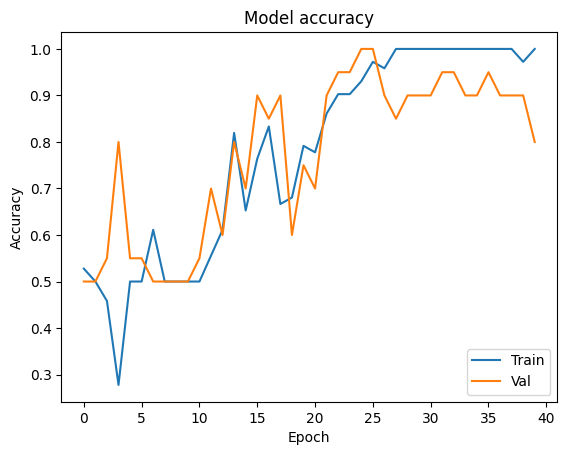

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [ ]:
train_generator.reset()
score = model.evaluate(train_generator, steps=len(train_generator))
print('Train accuracy:', round(score[1]*100, 2))

6/6 [==============================] - 5s 748ms/step - loss: 0.0085 - accuracy: 1.0000
Train accuracy: 100.0


In [ ]:
validation_generator.reset()
score = model.evaluate(validation_generator, steps=len(validation_generator))
print('Test accuracy:', round(score[1]*100, 2))

5/5 [==============================] - 1s 251ms/step - loss: 0.8293 - accuracy: 0.8000
Test accuracy: 80.0


5/5 [==============================] - 1s 256ms/step


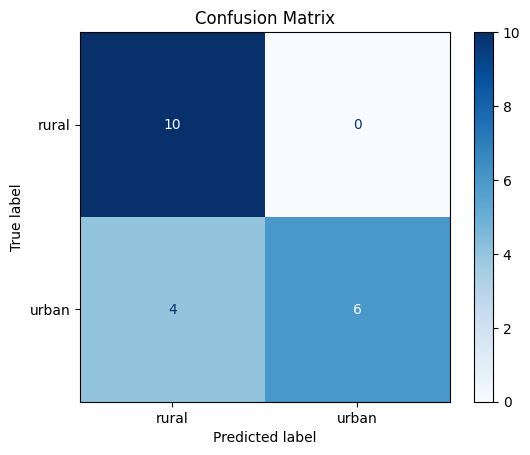

In [ ]:
validation_generator.reset()
y_pred = model.predict(validation_generator, steps=len(validation_generator), verbose=1)
y_pred = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels
class_labels = [class_name for class_name in validation_generator.class_indices.keys()]
y_true = validation_generator.classes

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_path = 'images\\val\\rural\\rural10.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

prediction = model.predict(img_array)
class_index = np.argmax(prediction, axis=1)

class_labels = [class_name for class_name in train_generator.class_indices.keys()]
predicted_class_label = class_labels[class_index[0]]

plt.imshow(img)
plt.title(f'Predicted class: {predicted_class_label}')
plt.axis('off')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'images\\val\\rural\\rural10.jpeg'

In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_path = 'images\\val\\rural\\rural10.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

prediction = model.predict(img_array)
class_index = np.argmax(prediction, axis=1)

class_labels = [class_name for class_name in train_generator.class_indices.keys()]
predicted_class_label = class_labels[class_index[0]]

plt.imshow(img)
plt.title(f'Predicted class: {predicted_class_label}')
plt.axis('off')
plt.show()


In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def load_and_preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))
    img_array = np.array(img) / 255.0
    return img_array



folder_path_urban = "images\\val\\urban"
folder_path_rural = "images\\val\\rural"

jpeg_files_urban = [f for f in os.listdir(folder_path_urban) if f.endswith(".jpeg") or f.endswith(".jpg")]
jpeg_files_rural = [f for f in os.listdir(folder_path_rural) if f.endswith(".jpeg") or f.endswith(".jpg")]

num_photos_to_display = 10
true_class="urban"
print("Some Urban Images: ")
for i, jpeg_file in enumerate(jpeg_files_urban[:num_photos_to_display]):
    image_path = os.path.join(folder_path_urban, jpeg_file)

    img_array = load_and_preprocess_image(image_path)

    prediction = model.predict(np.expand_dims(img_array, axis=0),verbose=0)
    class_index = np.argmax(prediction, axis=1)
    class_labels = [class_name for class_name in validation_generator.class_indices.keys()]
    predicted_class = class_labels[class_index[0]]
    text_color = 'green' if true_class == predicted_class else 'red'
    plt.subplot(2, num_photos_to_display, i + 1)
    plt.imshow(img_array)
    plt.text(0, 0, f'{predicted_class}', fontsize=8, color=text_color)

    plt.axis("off")

plt.show()
true_class="rural"
print("Some Rural Images: ")
for i, jpeg_file in enumerate(jpeg_files_rural[:num_photos_to_display]):
    image_path = os.path.join(folder_path_rural, jpeg_file)

    img_array = load_and_preprocess_image(image_path)

    prediction = model.predict(np.expand_dims(img_array, axis=0),verbose=0)
    class_index = np.argmax(prediction, axis=1)
    class_labels = [class_name for class_name in validation_generator.class_indices.keys()]
    predicted_class = class_labels[class_index[0]]
    text_color = 'green' if true_class == predicted_class else 'red'
    plt.subplot(2, num_photos_to_display, i + 1)
    plt.imshow(img_array)
    plt.text(0, 0, f'{predicted_class}', fontsize=8, color=text_color)

    plt.axis("off")
